In [1]:
#import the required packages for linear and polynomial regression
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import glob

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
from pandas.tseries.offsets import *
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Get the data
df = pd.read_csv(r'./main.csv', index_col=None, header=0)

In [3]:
#Get the required columns
ds = df[['Last_Update','Province_State','Confirmed']]

In [4]:
ds

,Last_Update,Province_State,Confirmed
0,8/2/2020 4:35,Alabama,89349
1,8/2/2020 4:35,Alaska,3136
2,8/2/2020 4:35,Arizona,177002
3,8/2/2020 4:35,Arkansas,43173
4,8/2/2020 4:35,California,506613
...,...,...,...
1545,9/1/2020 4:30,Virginia,120594
1546,9/1/2020 4:30,Washington,74635
1547,9/1/2020 4:30,West Virginia,10249
1548,9/1/2020 4:30,Wisconsin,75603


In [9]:
#Remove the hours from the time column: 
ds['Last_Update'] = pd.to_datetime(ds['Last_Update']).dt.date

In [6]:
#set the series to time series (problem of old version)
pd.TimeSeries = pd.Series


# A function for forcasting and returning the new table
# This only work for the next 26 days

def time_series_forecast(ds):
    
    #Get the confimred values of the state
    ConfValue = ds.Confirmed.values
    
    #Find the time series
    timeser = pd.TimeSeries(ConfValue , index=pd.to_datetime(ds.Last_Update))
    
    #It is a non-stationary graph so we can turn it into stationary by taking the log
    ts_log_data = np.log(timeser)
    try:
        #Use Autoregressive–moving-average model for prediction
        model = sm.tsa.ARMA(ts_log_data, order=(3, 0)).fit()
        
        #Set the starting and Ending dates
        start_date = ts_log_data.index[-1] + Day(1)
        end_date = ts_log_data.index[-1] + Day(26)
        
        #Predict the values
        y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())
        
        #Return a table with the new values
        Final_Table = pd.Series(np.exp(y_forecast).values, np.arange(1, 27))
        
        return Final_Table
    
    #if there is a convergance error pass it
    except Exception:
        pass

In [10]:
#Find the prediction value of next 26 days for each State
GroupByState = ds.groupby('Province_State')
FinalTable = GroupByState.apply(time_series_forecast)

In [8]:
#The final data table
FinalTable

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,126992.404046,127699.699729,128358.735468,128874.904947,129299.364272,129606.951537,129813.673024,129914.536781,129916.343855,129820.322923,...,126775.145077,126056.913874,125282.939905,124458.368681,123588.326028,122677.880157,121732.018155,120755.619155,119753.433542,118730.063300
Alaska,5290.415089,5308.591464,5317.857390,5318.602582,5311.266856,5296.331358,5274.309788,5245.739891,5211.175338,5171.178152,...,4785.158899,4720.967941,4655.866191,4590.234258,4524.422996,4458.753576,4393.517918,4328.979412,4265.373902,4202.910848
Arizona,202004.434857,202061.428599,202068.804549,201994.109468,201858.758494,201654.384306,201389.686878,201064.149752,200682.725242,200247.575088,...,196003.292030,195269.584286,194515.141590,193743.596584,192958.523072,192163.414044,191361.673021,190556.600084,189751.382985,188949.087490
Arkansas,61543.917911,61786.769483,61968.631706,62084.238310,62139.295427,62134.685402,62074.087668,61960.210438,61796.554651,61586.493449,...,59123.618472,58673.506306,58209.180255,57733.794050,57250.347776,56761.678055,56270.451155,55779.158474,55290.114293,54805.455489
California,715758.889380,720544.944373,722954.643492,726133.250994,727523.282130,729207.689882,729510.884959,729812.389771,729023.426914,728059.786164,...,706185.872916,701527.986913,696524.133282,691314.273669,685851.396961,680237.974059,674455.270615,668580.286553,662611.279279,656607.470285
Colorado,57542.230072,57667.259919,57750.109624,57809.498606,57835.557686,57835.872696,57807.678285,57754.609533,57676.582043,57575.869378,...,56353.026000,56123.145925,55884.075885,55637.293664,55384.226821,55126.260742,54864.725747,54600.898007,54335.993344,54071.166424
Connecticut,52890.689010,53001.566922,53008.288595,53040.295992,53043.193446,53052.452627,53053.563464,53056.249410,53056.649019,53057.430429,...,53057.949450,53057.955172,53057.956739,53057.958402,53057.958877,53057.959344,53057.959470,53057.959584,53057.959600,53057.959609
Delaware,17460.326137,17479.997670,17483.535829,17476.654638,17461.581363,17440.575713,17415.255174,17386.896283,17356.471575,17324.726744,...,17099.325441,17069.089059,17039.607656,17010.907534,16983.002387,16955.896396,16929.586614,16904.064800,16879.318836,16855.333802
Florida,624916.660261,625925.366195,626504.972946,626665.390228,626418.485042,625777.928922,624759.034706,623378.584896,621654.654221,619606.428943,...,597951.134546,594074.307673,590067.277552,585951.191481,581746.663301,577473.685625,573151.554051,568798.803058,564433.153192,560071.468975


In [62]:
FinalTable.to_csv(r'./first.csv', index = False)

In [8]:
#Checking the Diagram
pd.TimeSeries = pd.Series
ts_data = pd.TimeSeries(ds.Confirmed.values, index=pd.to_datetime(ds.Last_Update))

In [13]:
ts_log_data = np.log(ts_data)

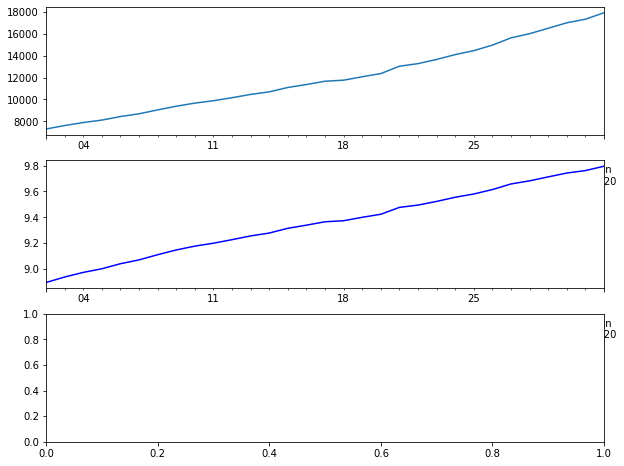

In [14]:
fig, axes = plt.subplots(figsize=(10,8), nrows=3)
ts_data.plot(ax=axes[0])
ts_log_data.plot(ax=axes[1], style='b-', label='actual')


In [56]:
model = sm.tsa.ARMA(ts_log_data, order=(3,0)).fit()
print(model.params)


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const      15.868843
ar.L1.y     0.996787
ar.L2.y     0.982778
ar.L3.y    -0.979587
dtype: float64


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [57]:
start_date = ts_log_data.index[-1] + Day(1)
end_date = ts_log_data.index[-1] + Day(10)

In [58]:
y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())

In [59]:
print(y_forecast)


2020-06-02     9.814174
2020-06-03     9.847156
2020-06-04     9.865522
2020-06-05     9.897909
2020-06-06     9.915932
2020-06-07     9.947735
2020-06-08     9.965423
2020-06-09     9.996654
2020-06-10    10.014015
2020-06-11    10.044686
Freq: D, dtype: float64


In [60]:
print(np.exp(y_forecast))

2020-06-02    18291.172109
2020-06-03    18904.516085
2020-06-04    19254.928891
2020-06-05    19888.737310
2020-06-06    20250.449099
2020-06-07    20904.822096
2020-06-08    21277.880938
2020-06-09    21952.898374
2020-06-10    22337.342233
2020-06-11    23033.063814
Freq: D, dtype: float64
